# Image processing for Code Segmentation


In [36]:
import os
from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Example image to be processed


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

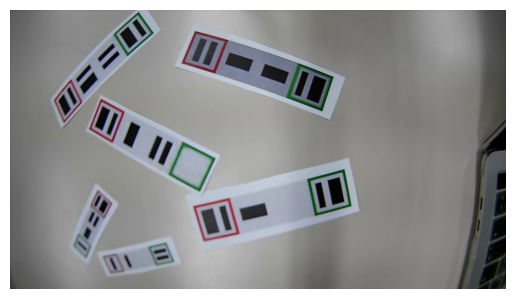

In [37]:
# Load the image
image = cv2.imread("mix_G1_64.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')


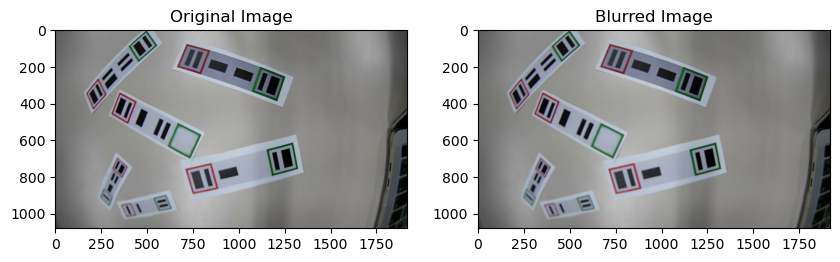

In [38]:
# Blur the image
image_blurred = cv2.GaussianBlur(image, (7,7), 0)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.title('Original Image'); plt.imshow(image)
plt.subplot(1, 2, 2); plt.title('Blurred Image'); plt.imshow(image_blurred)

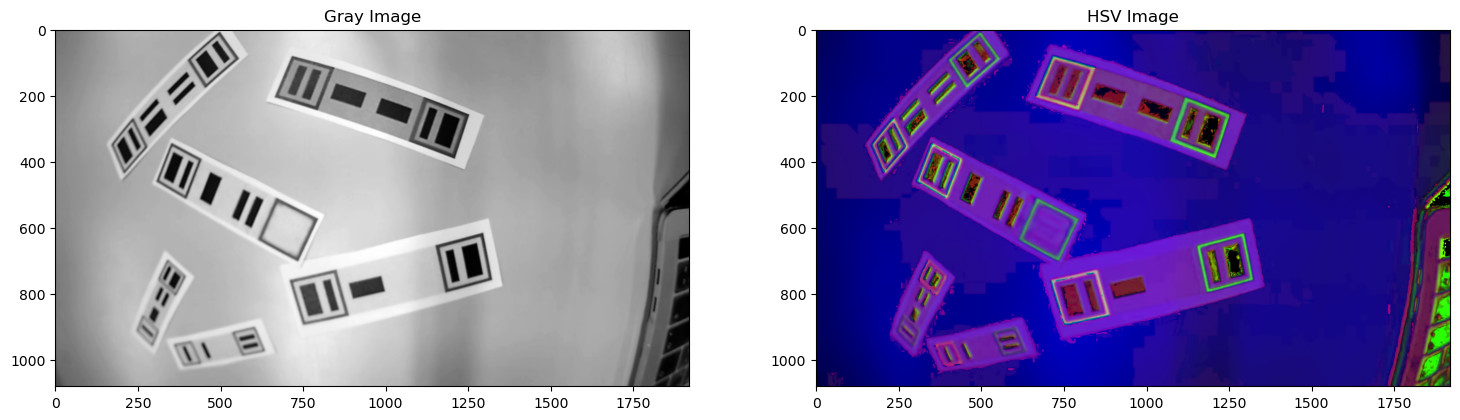

In [39]:
# Convert the image to grayscale and hsv
gray = cv2.cvtColor(image_blurred, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image_blurred, cv2.COLOR_RGB2HSV)

# Print images 
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1) ; plt.title('Gray Image') ; plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2) ; plt.title('HSV Image') ; plt.imshow(hsv)

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

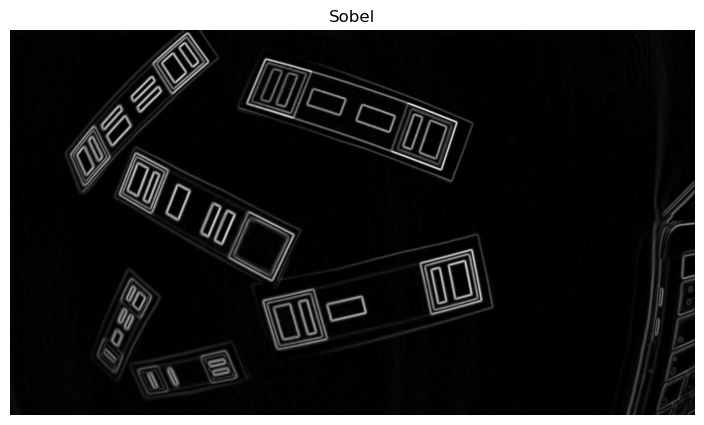

In [47]:
# Sobel filter the image.
## Apply the Sobel filter to the image. The Sobel filter is used to find the edges in an image.

img_rgb_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=11) # ksize is the kernel size
img_rgb_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=11) 
img_rgb_sobel = np.sqrt(img_rgb_sobel_x**2 + img_rgb_sobel_y**2)
img_rgb_sobel = cv2.normalize(img_rgb_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the sobel image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_sobel, cmap='gray'), plt.title('Sobel') ; plt.axis('off')

(<Axes: >, <matplotlib.image.AxesImage at 0x1d45a0cf9b0>)

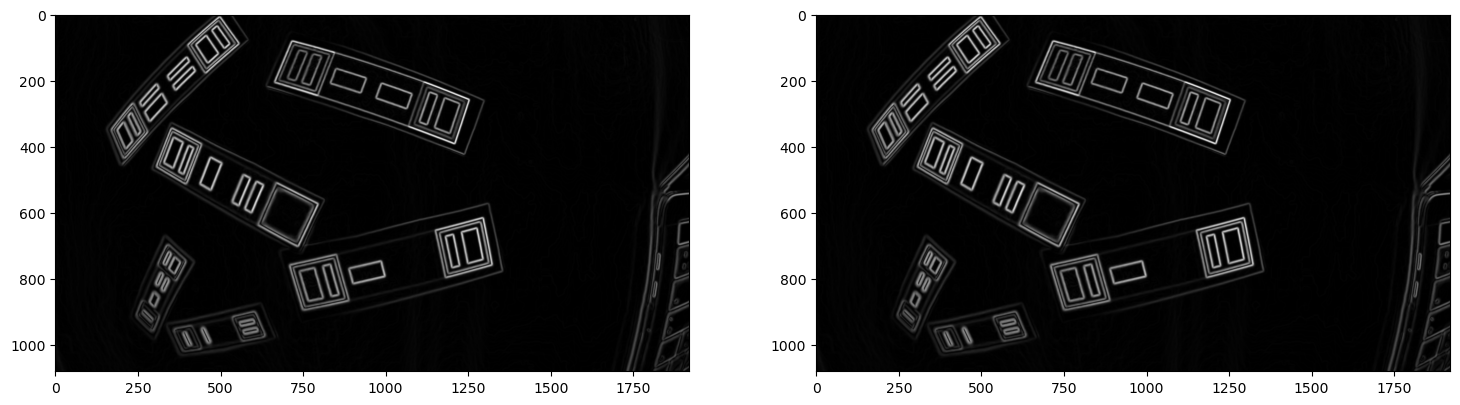

In [48]:

# Upscale the image from CV_64F to CV_8U
img_rgb_sobel_8U = cv2.normalize(img_rgb_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the sobel image
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_rgb_sobel, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_sobel_8U, cmap='gray')